Q1. **What is Gradient Boosting Regression?**
Gradient Boosting Regression is a machine learning technique that combines the predictions of several weak learners (typically decision trees) to create a strong predictive model. It belongs to the ensemble learning family, where multiple models are trained and their outputs are combined to improve overall performance. In gradient boosting, the models are trained sequentially, with each new model attempting to correct the errors made by the previous ones.

Q2. **Implement a simple gradient boosting algorithm from scratch using Python and NumPy:**



In [31]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Generate a toy dataset
np.random.seed(42)
X = np.random.rand(100, 1)
y = 4 * X.squeeze() + np.random.randn(100)

# Initialize parameters
learning_rate = 0.1
n_trees = 100

# Initialize predictions with the mean of the target variable
predictions = np.mean(y) * np.ones_like(y)

# Build trees sequentially
for i in range(n_trees):
    # Calculate residuals
    residuals = y - predictions
    
    # Train a weak learner (Decision Tree) on residuals
    tree = DecisionTreeRegressor(max_depth=3)
    tree.fit(X, residuals)
    
    # Update predictions with the contribution from the new tree
    predictions += learning_rate * tree.predict(X)

# Evaluate the model
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.1309888322801297
R-squared: 0.9312279328743247




Q3. **Experiment with different hyperparameters:**


In [24]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [25]:
X,y = make_regression(n_samples=1000,n_features= 20,n_informative=10,n_targets=1,random_state=42)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
regressor = GradientBoostingRegressor(random_state=0)
regressor.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [28]:
ypred = regressor.predict(X_test)
print('The r2 score is ',r2_score(y_test,ypred))

The r2 score is  0.9114032667276368


In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


In [30]:
ypred_best = best_model.predict(X_test)

print('The r2 score is ',r2_score(y_test,ypred_best))

The r2 score is  0.9350503275606448



Q4. **What is a weak learner in Gradient Boosting?**
A weak learner is a model that performs slightly better than random chance. In the context of gradient boosting, decision trees with limited depth are commonly used as weak learners. These models are simple and have modest predictive power on their own, but when combined in an ensemble, they contribute to the overall predictive strength of the model.

Q5. **What is the intuition behind the Gradient Boosting algorithm?**
The intuition behind the Gradient Boosting algorithm is to sequentially build a series of weak learners, each one correcting the errors made by the previous ones. It focuses on minimizing the residuals (the differences between actual and predicted values) by optimizing the loss function during each iteration.

Q6. **How does Gradient Boosting algorithm build an ensemble of weak learners?**
The algorithm builds an ensemble by training each weak learner sequentially. After training each tree, the predictions are combined, and subsequent trees are trained to correct the errors of the combined predictions from the previous trees. This process continues until a specified number of trees (or stopping criteria) is reached.

Q7. **What are the steps involved in constructing the mathematical intuition of Gradient Boosting algorithm?**


1. **Create a Base Model (Iteration 0):**
   - Initialize the base model as a simple prediction, often the mean of the target variable.


2. **Compute Residuals (Iteration 0):**
   - Calculate the residuals for each observation as the difference between the actual target values and the initial predictions


3. **Construct a Decision Tree (Iteration 1):**
   - Train a decision tree  using the input features  and the residuals  from the base model.
   - The decision tree is constructed to predict the residuals  for each observation.

4. **Predict Output (Iteration 1):**
   - Use the decision tree  to predict the residuals for each observation.


5. **Update Predictions (Iteration 1):**
   - Update the overall prediction by multiplying learing rate of the weak learner's predictions to the initial predictions.

6. **Compute Residuals (Iteration 1):**
   - Calculate new residuals  as the difference between the actual target values  and the updated predictions 

7. **Construct a Decision Tree (Iteration 2):**
   - Train a new decision tree  using the input features and the updated residuals
   - The decision tree is constructed to predict the updated residuals  for each observation.

8. **Predict Output (Iteration 2):**
   - Use the new decision tree  to predict the updated residuals for each observation.

9. **Update Predictions (Iteration 2):**
   - Update the overall prediction by multiplying learing rate of the new weak learner's predictions to the previous predictions.

10. **Repeat Steps 6-9:**
    - Repeat steps 6-9 for a specified number of iterations or until a stopping criterion is met.

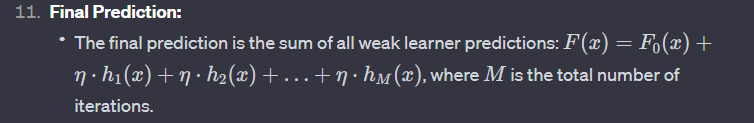
